<a href="https://colab.research.google.com/github/bhavikakaura/Dataa-for-Risk-Analysis-of-5G-Network-Security/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz
import pandas as pd
from graphviz import Digraph
from google.colab import files


In [2]:
from google.colab import files
uploaded = files.upload()


Saving realistic_5G_security_dataset (1).csv to realistic_5G_security_dataset (1).csv


In [3]:
import pandas as pd

df = pd.read_csv('realistic_5G_security_dataset (1).csv')  # match exact filename shown
df.head()


,Incident_ID,CVE_ID,Threat_Type,CVSS_Score,Incident_Frequency_Yearly,Economic_Impact_kCAD,Downtime_Hours,Affected_Users_k,Affected_Component
0,INC-00001,CVE-2024-16795,DDoS,6.7,6,100,8,5,User Equipment (UE)
1,INC-00002,CVE-2022-77820,DDoS,5.0,3,1000,24,100,Radio Access Network (RAN)
2,INC-00003,CVE-2024-7265,Unauthorized Access,8.8,5,250,2,20,Radio Access Network (RAN)
3,INC-00004,CVE-2020-38194,Network Slice Breach,6.5,6,500,4,500,Multi-access Edge Computing (MEC)
4,INC-00005,CVE-2020-45131,DDoS,10.0,3,1000,2,20,Radio Access Network (RAN)


In [6]:
# Create the decision tree diagram with right-to-left orientation
dot = Digraph(format='png', graph_attr={'rankdir': 'LR'})

# Square node: decision
dot.node('D1', 'Security Investment Strategy', shape='box')

# Branches for decision: High vs Low
dot.node('C1', 'High Investment → Threat Occurs', shape='circle')
dot.node('C2', 'Low Investment → Threat Occurs', shape='circle')
dot.edge('D1', 'C1', label='High')
dot.edge('D1', 'C2', label='Low')

# Chance nodes (events after High Investment)
dot.node('E1', 'DDoS\nP=0.3', shape='ellipse')
dot.node('E2', 'Unauthorized Access\nP=0.4', shape='ellipse')
dot.node('E3', 'Network Slice Breach\nP=0.3', shape='ellipse')

dot.edge('C1', 'E1')
dot.edge('C1', 'E2')
dot.edge('C1', 'E3')

# Outcomes from E1-E3 (High Investment)
dot.node('P1', 'Impact: $100k', shape='plaintext')
dot.node('P2', 'Impact: $250k', shape='plaintext')
dot.node('P3', 'Impact: $300k', shape='plaintext')

dot.edge('E1', 'P1')
dot.edge('E2', 'P2')
dot.edge('E3', 'P3')

# Chance nodes (events after Low Investment)
dot.node('E4', 'DDoS\nP=0.3', shape='ellipse')
dot.node('E5', 'Unauthorized Access\nP=0.4', shape='ellipse')
dot.node('E6', 'Network Slice Breach\nP=0.3', shape='ellipse')

dot.edge('C2', 'E4')
dot.edge('C2', 'E5')
dot.edge('C2', 'E6')

# Outcomes from E4-E6 (Low Investment)
dot.node('P4', 'Impact: $500k', shape='plaintext')
dot.node('P5', 'Impact: $750k', shape='plaintext')
dot.node('P6', 'Impact: $1M', shape='plaintext')

dot.edge('E4', 'P4')
dot.edge('E5', 'P5')
dot.edge('E6', 'P6')


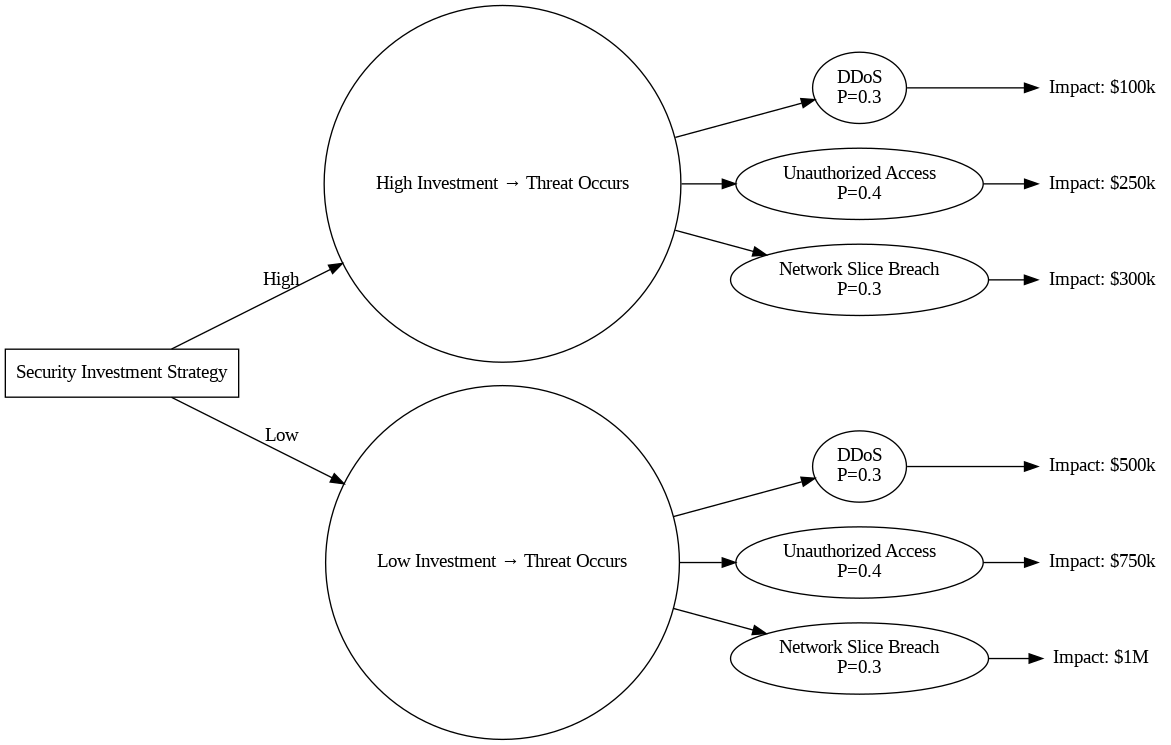

In [7]:
dot.render('/content/decision_tree_lr', format='png', cleanup=False)
from IPython.display import Image
Image('/content/decision_tree_lr.png')


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/realistic_5G_security_dataset (1).csv')

# View the first few rows of the data
df.head()

# Filter the relevant columns for analysis
# We're using Economic Impact (Economic_Impact_kCAD) and the different investment strategies (High vs Low).
# You could also apply this to other columns like Downtime if needed.

# For simplicity, let's assume we have High and Low Investment scenarios.
high_investment_outcomes = df[df['Incident_Frequency_Yearly'] > 5]['Economic_Impact_kCAD'].tolist()  # High impact
low_investment_outcomes = df[df['Incident_Frequency_Yearly'] <= 5]['Economic_Impact_kCAD'].tolist()  # Low impact

# Apply decision-making approaches

## 1. Optimistic Approach (Maximax)
max_high = max(high_investment_outcomes)
max_low = max(low_investment_outcomes)

best_decision_optimistic = "High Investment" if max_high > max_low else "Low Investment"
print(f"Optimistic Approach: {best_decision_optimistic} with a maximum payoff of ${max(max_high, max_low):,.0f}")

## 2. Conservative Approach (Maximin)
min_high = min(high_investment_outcomes)
min_low = min(low_investment_outcomes)

best_decision_conservative = "High Investment" if min_high > min_low else "Low Investment"
print(f"Conservative Approach: {best_decision_conservative} with a minimum payoff of ${min(min_high, min_low):,.0f}")

## 3. Minimax Regret Approach
best_outcome = max(max_high, max_low)  # Best possible payoff across all states

# Calculate regrets
regret_high = [best_outcome - outcome for outcome in high_investment_outcomes]
regret_low = [best_outcome - outcome for outcome in low_investment_outcomes]

# Maximum regret for each alternative
max_regret_high = max(regret_high)
max_regret_low = max(regret_low)

best_decision_regret = "High Investment" if max_regret_high < max_regret_low else "Low Investment"
print(f"Minimax Regret Approach: {best_decision_regret} with a maximum regret of ${max(max_regret_high, max_regret_low):,.0f}")


Optimistic Approach: Low Investment with a maximum payoff of $5,000
Conservative Approach: Low Investment with a minimum payoff of $50
Minimax Regret Approach: Low Investment with a maximum regret of $4,950


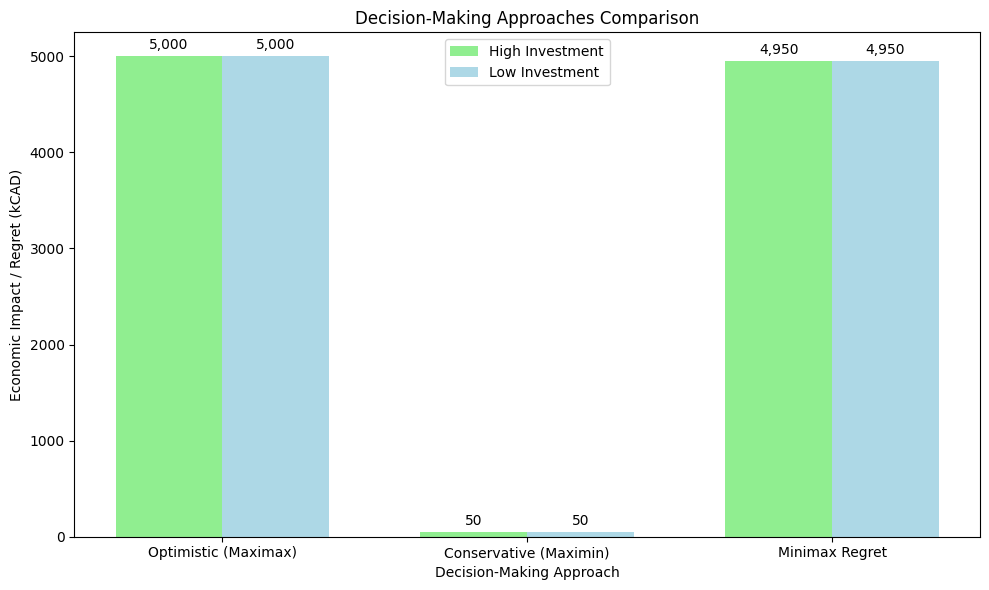

In [11]:
import matplotlib.pyplot as plt

# Values from previous decision tree analysis
# Payoffs from the decision tree for High and Low Investment strategies

# Optimistic (Maximax)
optimistic_high = max_high
optimistic_low = max_low

# Conservative (Maximin)
conservative_high = min_high
conservative_low = min_low

# Minimax Regret (maximum regret for High and Low)
regret_high = max_regret_high
regret_low = max_regret_low

# Plotting the results

# Bar chart for the approaches
fig, ax = plt.subplots(figsize=(10, 6))

approaches = ['Optimistic (Maximax)', 'Conservative (Maximin)', 'Minimax Regret']
high_investment = [optimistic_high, conservative_high, regret_high]
low_investment = [optimistic_low, conservative_low, regret_low]

bar_width = 0.35
index = range(len(approaches))

# Plot the bars for High and Low investment
bar1 = ax.bar(index, high_investment, bar_width, label='High Investment', color='lightgreen')
bar2 = ax.bar([i + bar_width for i in index], low_investment, bar_width, label='Low Investment', color='lightblue')

# Adding labels and titles
ax.set_xlabel('Decision-Making Approach')
ax.set_ylabel('Economic Impact / Regret (kCAD)')
ax.set_title('Decision-Making Approaches Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(approaches)
ax.legend()

# Adding the values on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()
